# HW 6 - Logistic Regression 

## Instructions

This problem set revolves around logistic regression and predictive modeling. Its main goals are
1. Learn to use and interpret logistic regression results
2. Learn to handle categorical variables
3. learn to predict the outcomes, and compare those with the actual data.

Parts of this assignment involve some complex data wrangling before you can train your models. You need to fill out missing values and combine entries across rows before you can run your regression models. 

---

# Who will win the elections? 

For this assignment, your task is to predicit the winner of the U.S. 2020 presidential elections by each county, and explain the winner using population density, education level, income, and geographic differences (the census region). 

The dataset is in a file is called us-elections_2000-2020.csv.bz2. The variables are as follows: 

* __FIPS__: county FIPS code (numeric county code)
* __year__: election year
* __state__: state name
* __state2__: 2-letter state code
* __region__: census region (west, midwest, south, northeast) 
* __county__: county name
* __office__: President (we look only at presidential elections) 
* __candidate__: name of the candidate
* __party__: party of the candidate
* __candidatevotes__: votes received by this candidate for this particular party
* __totalvotes__: total number of votes cast in this county-year
* __income__: personal income, USD/per capita (BEA—Bureau of Economic Analysis—data)
* __population__: population, census estimate (BEA data)
* __LND010200D__: land area (sq.mi) at 2000 (Census data)
* __EDU600209D__: Persons 25 years and over, total 2005-2009
* __EDU695209D__: Educational attainment - persons 25 years and over - bachelor’s degree 2005-2009
* __POP010210D__: Resident population (April 1 - complete count) 2010
* __POP220210D__: Population of one race - White alone 2010 (complete count)
* __POP250210D__: Population of one race - Black or African American alone 2010
(complete count) 
* __POP320210D__: Population of one race - Asian alone 2010 (complete count)
* __POP400210D__: Hispanic or Latino population 2010 (complete count)
* __PST110209D__: Resident total population estimate, net change - April 1, 2000 to July 1, 2009 
* __BIRTHS2020__: Births in period 4/1/2020 to 6/30/2020
* __DEATHS2020__: Deaths in period 4/1/2020 to 6/30/2020

---

In [1]:
import pandas as pd
import statsmodels.formula.api as smf
import seaborn as sns

# 1 - Loading the Dataset  (15 pts)

1. (3pt) Load data, and do the basic checks.


2. (4pt) How many missing values are in the dataset for each of the columns? 


3. (8pt) Come up with two questions/tasks you'd want to ask about this dataset that you could answer using a regression model. For each question/task indicate whether you'd need to use linear or logistic regression (or both). 


In [2]:
#1.1 Load data, do basic checks
# It's tab separated!
elec_df = pd.read_csv("us-elections_2000-2020.csv", sep = "\t")

print(elec_df)
##print(elec_df[["year", "office", "candidate", "party"]])
elec_df.shape
# Looks pretty normal to me! 37390 rows x 24 columns tracks. I don't see any major issue aside form missing values.


#1.2 How many missing values are in the dataset for each of the columns?
nan_count = elec_df.isna().sum()
print(nan_count)


        FIPS  year    state state2         county     office        candidate  \
0       1001  2000  Alabama     AL        Autauga  President          Al Gore   
1       1001  2000  Alabama     AL        Autauga  President   George W. Bush   
2       1001  2004  Alabama     AL        Autauga  President       John Kerry   
3       1001  2004  Alabama     AL        Autauga  President   George W. Bush   
4       1001  2008  Alabama     AL        Autauga  President     Barack Obama   
...      ...   ...      ...    ...            ...        ...              ...   
37385  56045  2012  Wyoming     WY         Weston  President      Mitt Romney   
37386  56045  2016  Wyoming     WY         Weston  President  Hillary Clinton   
37387  56045  2016  Wyoming     WY         Weston  President     Donald Trump   
37388  56045  2020  Wyoming     WY  Weston County  President     Donald Trump   
37389  56045  2020  Wyoming     WY  Weston County  President     Joshep Biden   

            party  candidat

#### 1.2 Explanation
THere are 6762 missing values for both the income and population columns. Additionally, there are 20 missing values for both the BIRTHS2020 and DEATHS2020 columns. All other columns have 0 missing values.

#### 1.3: Come up with two questions/tasks you'd want to ask about this dataset that you could answer using a regression model. For each question/task indicate whether you'd need to use linear or logistic regression (or both). 

1: I would like to see, how do number of people 25+ in 2005-2009 in a county (EDU600209D), the educational attainment of a county in 2005-2009 (EDU695209D), and the personal income, USD/per capita of that county (income) affect the party that a vote is given to? This would be logistic regression, as we'd be seeing how those characteristics affect the categorical variable of "party", which takes discrete values of republican or democrat.

2: I would like to see, how has voter participation changed over time? I would create a new column "voter_ratio" by taking totalvotes and dividing that by population to see what percentage of residents in a given county voted in each election cycle. Then I would do a regression of voter_ratio on year. This would be linear regression, as it would create a model to predict the continuous value voter_ratio based on the year.

# 2 -  Cleaning the Dataset (20pts)


You are going to work with 2020 data. However, some important information for 2020 is missing. First, we check how does missing data look like, and thereafter we fill it with the most recent values that are there.


1. (3pt) print the rows of the data frame from index 6264 to 6271 (i.e. these index values of the data frame). For simplicity, you may only include variables fips, county, year and income.
Hint: check out the ```.loc[]``` attribute, see Python Notes 3.3.4.


2. (9pt) You see that some income values are missing in the example from question 1.
 * (a) Which values do you expect to see instead of NA-s in lines 6266, 6267, 6268 and 6269?
 * (b) How is it related to the non-missing income, county and fips values?
 * (c) What method would you use to fill in the missings (what computer code and variables)? Hint: check out the ```sort_values``` and ```DataFrame.fillna``` method.


3. (4pt) Fill the missings in all columns you need (not only in income) with the most recent values that exist in the data. Ensure you do not fill missings with values from other counties.

Hint: when grouping by fips, pandas will remove the variable, even if you set ```as_index=False``` for some reason. A simple way around is to create another variable, e.g. ```fips2 == fips```, and use that for grouping. In this way fips will be preserved.


4. (4pt) Print out the same lines you did above in 1.1. Does it look what you expected? Pay close attention to the relationship between the FIPS code and the counties.

Hint: If you did this correctly, then even after filling in NA-s there are a few missing cases left.


In [3]:
#2.1
missing_df = elec_df.loc[6264:6271, ["FIPS", "county", "year", "income"]]
print(missing_df)


       FIPS        county  year   income
6264  15007         Kauai  2016  44958.0
6265  15007         Kauai  2016  44958.0
6266  15007  Kauai County  2020      NaN
6267  15007  Kauai County  2020      NaN
6268  15009          Maui  2000      NaN
6269  15009          Maui  2000      NaN
6270  15009          Maui  2004      NaN
6271  15009          Maui  2004      NaN


#### 2.2 You see that some income values are missing in the example from question 1.

##### 2.2A Which values do you expect to see instead of NA-s in lines 6266, 6267, 6268 and 6269?
For lines 6266 and 6262, the NaN values would normally be the income (USD / per capita) for Kauai County in 2020. For lines 6268 and 6269, they should be the income (USD / per capita) of Maui in 2000. Lines 6720 and 6271 should be the income (USD / per capita) for Maui in 2004.

##### 2.2B How is it related to the non-missing income, county and fips values?
In rows 6264 and 6265 with complete data, the county name is "Kauai." In rows 6266 and 6267 with missing income values, the county name is "Kauai County." All 4 lines must be referring to the same county, as the FIPS code (15007) is the same for all 4 of those rows. It seems that between 2016 and 2020, the name of Kauai County was changed to include the word "county."

##### 2.2C What method would you use to fill in the missings (what computer code and variables)? 
##### Hint: check out the "sort_values" and "DataFrame.fillna" method.

I would use the DataFrame.fillna method, as that's what the hint is suggesting [<3]

First, I'd sort the data by FIPS so that all of the data for a given county / FIP is placed together in the dataframe. Then I'd sort by year in ascending order, so that a previous year's county data could be used to fill in gaps in the next year's county data if there are NA values. Then I'd used the DataFrame.fillna method to "inherit" the income values of previous income years in that county. For instance, rows 6266 and 6267 (Kauai County, 2020) would inherit the income value (44958.0) from the previous rows (Kauai, 2016).  


In [4]:
#2.3 Fill the missings in all columns you need (not only in income) with the most recent values that exist in the data. 
# Ensure you do not fill missings with values from other counties.

#Hint: when grouping by fips, pandas will remove the variable, even if you set ```as_index=False``` for some reason. 
#A simple way around is to create another variable, e.g. ```fips2 == fips```, and use that for grouping. In this way fips will be preserved.

e_fips = elec_df["FIPS"]
#e_fips = elec_df.FIPS
elec_df["FIPS2"] = e_fips

# ffill = Fill values by propagating the last valid observation to next valid.

elec_df = elec_df.sort_values(by = ["FIPS2", "year"], ascending = [True, True])
elec_df = elec_df.groupby("FIPS2").fillna(method = "ffill")



#2.4 Print out the same lines you did above in 1.1. Does it look what you expected? 
#Pay close attention to the relationship between the FIPS code and the counties.
#Hint: If you did this correctly, then even after filling in NA-s there are a few missing cases left.

test_df = elec_df.loc[6264:6271, ["FIPS", "county", "year", "income"]]
print(test_df)

       FIPS        county  year   income
6264  15007         Kauai  2016  44958.0
6265  15007         Kauai  2016  44958.0
6266  15007  Kauai County  2020  44958.0
6267  15007  Kauai County  2020  44958.0
6268  15009          Maui  2000      NaN
6269  15009          Maui  2000      NaN
6270  15009          Maui  2004      NaN
6271  15009          Maui  2004      NaN


#### 2.4 Explanation
Yes, the filled-in subsection of elec_Df looks mostly like what I expected. However, there are still some NA values, which I wasn't expecting. Maybe this is because of the year the data started being collected? If there's no previous data to fill in the gaps with, early years like 2000 and 2004 would still remain empty.

# 3 - Feature Engineering (30 pts)

Now it is time to select the neccesary data and create the features you need for the analysis below.

1. (15pt) Make a new data frame that only contains 2020 data, and that contains a binary variable: whether or not democrats won in that county in 2020.

Hint: You can build that variable by first extracting the rows for democrats and the rows for republicans, and then comparing the corresponding candidate votes columns. But you have to fix the index!

However, when you extract the vote numbers, it will be a series with an index. You may want to either reset the index or convert the series into a numpy array with the .values attribute. See Python Notes) 6.3 Combining data into data frames for some related explanation.

Note that it is not enough to just check if democrats/republicans got more than 50% of votes.


2. (8pt) Create auxiliary variables: population density (population divided by land area); and percentage of college graduates.

Hint: there are several population measures. You can use any of those, the results will be slighlty different but as population is not changing fast, it should not have much of an impact.


3. (4pt) Are countries with younger population more or less democratic? Compute (estimate) yearly birth rate and death rate. This is normally done as as the number of births/deaths per 1000 people per year, please do the same!

Hint: in data the births/deaths are not reported for a whole year!


4. (3pt) Ensure that the variables you are going to use are in a reasonable range!

Hint: there are values that do not make sense. Use min and max to check what is the range in data, and then find offending values and remove those. You may do other data cleaning tasks to fix the issues.

In [5]:
#3.1 Make a new data frame that only contains 2020 data, 
#and that contains a binary variable: whether or not democrats won in that county in 2020.

#Hint: You can build that variable by first extracting the rows for democrats and the rows for republicans, 
#and then comparing the corresponding candidate votes columns. But you have to fix the index!

#However, when you extract the vote numbers, it will be a series with an index. 
#You may want to either reset the index or convert the series into a numpy array with the .values attribute. 
#See Python Notes) 6.3 Combining data into data frames for some related explanation.

#Note that it is not enough to just check if democrats/republicans got more than 50% of votes.

elec_2020 = elec_df[elec_df["year"] == 2020]
#Now, reset the index
elec_2020 = elec_2020.reset_index()

rep_2020 = elec_2020[elec_2020["party"] == "republican"]
dem_2020 = elec_2020[elec_2020["party"] == "democrat"]

#Now, reset the indices 
rep_2020 = rep_2020.reset_index()
dem_2020 = dem_2020.reset_index()

dem_counties = [] # Will make a boolean democrats won (1, True) or democrats lost (0, False) list 
dem_2020.shape # There are 3111 rows in the dem_2020 df


for i in range (3111):
    if rep_2020["FIPS"][i] == dem_2020["FIPS"][i]: # Check if the county code matches between the dem and rep dfs
        if dem_2020["candidatevotes"][i] > rep_2020["candidatevotes"][i]:
            dem_counties.append(1)
            dem_counties.append(1) # Have to append twice, as each county has a republican and democratic entry in the main df!
        else: 
            dem_counties.append(0)
            dem_counties.append(0) # Have to append twice, as each county has a republican and democratic entry in the main df!
elec_2020["dem_wins"] = dem_counties
##print(elec_2020.head())
##print(elec_2020["dem_wins"].head(50))
print(elec_2020["dem_wins"].value_counts()/2) # Divide by 2 to account for 2 entries per county

# This seems odd... did Trump really win 2574 counties, and Biden only won 537 in 2020? Or did I do something wrong


dem_wins
0    2574.0
1     537.0
Name: count, dtype: float64


In [6]:
# 3.2 Create auxiliary variables: population density (population divided by land area); and percentage of college graduates.

#Hint: there are several population measures. 
#You can use any of those, the results will be slightly different 
#but as population is not changing fast, it should not have much of an impact.

elec_2020["pop_density"] = elec_2020["population"] / elec_2020["LND010200D"]
elec_2020["col_grad_prop"] = (elec_2020["EDU695209D"] / elec_2020["population"]) * 100 # Multiply by 100 to get percentages!


#### 3.2 Explanation
The pop_density column is the ratio of the census-estimated population of a given county (population) divided by the land area (LND010200D) in that county.

The col_grad_prop column is the ratio of college graduates (EDU695209D) in a county divided by the census-estimated population of a given county (population) * 100.

In [7]:
#3.3 Are countries with younger population more or less democratic? 
#Compute (estimate) yearly birth rate and death rate. 
#This is normally done as as the number of births/deaths per 1000 people per year, please do the same!
#Hint: in data the births/deaths are not reported for a whole year!

# Notes:
# BIRTHS2020: Births in period 4/1/2020 to 6/30/2020 --> 90 day window 
# DEATHS2020: Deaths in period 4/1/2020 to 6/30/2020 --> 90 day window 


pd.set_option("use_inf_as_na", True) # Handle infinities--> !!! THIS CODE WAS INSERTED FROM 3.3 PART 2!!!

pop_per_1000 = elec_2020["population"] / 1000
elec_2020["birth_rate"] = elec_2020["BIRTHS2020"] * (365/90) / pop_per_1000
elec_2020["death_rate"] = elec_2020["DEATHS2020"] * (365/90) / pop_per_1000 

# Now, how do we find if a county is older or younger? Compare birth and death rates
elec_2020["births_to_deaths"] = elec_2020["birth_rate"] / elec_2020["death_rate"]

dem_rate = elec_2020[elec_2020["dem_wins"] == 1]["births_to_deaths"].mean()
rep_rate = elec_2020[elec_2020["dem_wins"] == 0]["births_to_deaths"].mean()

print(dem_rate)
print(rep_rate) 


1.055731743986947
0.8674425377746765


In [8]:
#3.3 pt. 2
# REP_RATE = INFINITY? There must be some infinities in the dataset

# Let's replace those infinities with NA values
# Source: https://stackoverflow.com/questions/17477979/dropping-infinite-values-from-dataframes-in-pandas
# "pd.set_option('use_inf_as_na', True)"
# Have to insert in 3.3 pt.1 1o fix inf values

#### 3.3 Explanation
With infinity values fixed, we used birth_rate/death_rate ratio to estimate which counties have younger or older populations. Counties with more births than deaths tend to be younger, and vice versa.

We can see that in democratic counties, the births_to_deaths ratio is 1.055731743986947, while in republican counties, the births_to_deaths ratio is 0.8674425377746765. Using births_to_deaths as a representative of age, we see that counties with younger populations tend to be more democratic. 

In [9]:
#3.4 Ensure that the variables you are going to use are in a reasonable range!

#Hint: there are values that do not make sense. Use min and max to check what is the range in data, 
#and then find offending values and remove those. You may do other data cleaning tasks to fix the issues.

# How to apply methods to multiple columns source:
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.apply.html

mins = elec_2020.apply(min)
maxes = elec_2020.apply(max)

print(mins)
print(maxes)
    

index                             10
FIPS                            1001
year                            2020
state                        Alabama
state2                            AL
county              Abbeville County
office                     President
candidate               Donald Trump
party                       democrat
candidatevotes                   4.0
totalvotes                        66
income                       18183.0
population                     117.0
LND010200D                       0.0
EDU695209D                         0
EDU600209D                        77
POP010210D                        82
POP220210D                        65
POP250210D                         0
POP320210D                         0
POP400210D                         0
PST110209D                   -135313
BIRTHS2020                       0.0
DEATHS2020                       0.0
region                       midwest
dem_wins                           0
pop_density                  0.17286
c

#### 3.4 Explanation
Everything looks pretty normal now that we've removed the infinity values from the dataset in step 3.3. The only issue is the NaN values in the pop_density column, which we will need to use later. So, let's remove those NA values!

In [10]:
#3.4 
elec_2020 = elec_2020.dropna(subset = ["pop_density"])
# Now we've removed the NA values from the pop_density row.

# 4 - Model (35 pts)

1. (10pt) Visualize the realationships between population density, education level, income, birth rate, death rate across each of the counties. To do this, you should create a scatterplot matrix (see the following tutorials using [Seaborn](https://seaborn.pydata.org/examples/scatterplot_matrix.html) or [Plotly](https://plotly.com/python/splom/)). You should color the points in your scatterplot based on whether or not democrats won in that county in 2020. Describe any patterns you see in this visualization. 


2. (10pt) Estimate logistic regression model where you explain democrats’ winning with population density, education level, income, birth rate, death rate, and census region.


3. (5pt) Why do we use logistic regression here, instead of linear regression?


4. (10pt) Interpret the results. Which results are statistically significant?

Note: you may want to change some of the units, e.g. you may want to measure population density in 1000/per sq mi, instead of persons per sq mi.
Hint: your West should be the largest, North-East should be fairly large as well. South is the smallest. The exact value depends on the exact steps you took for cleaning data, and how exactly do you define the variables you engineer.

C:\Users\tduon\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


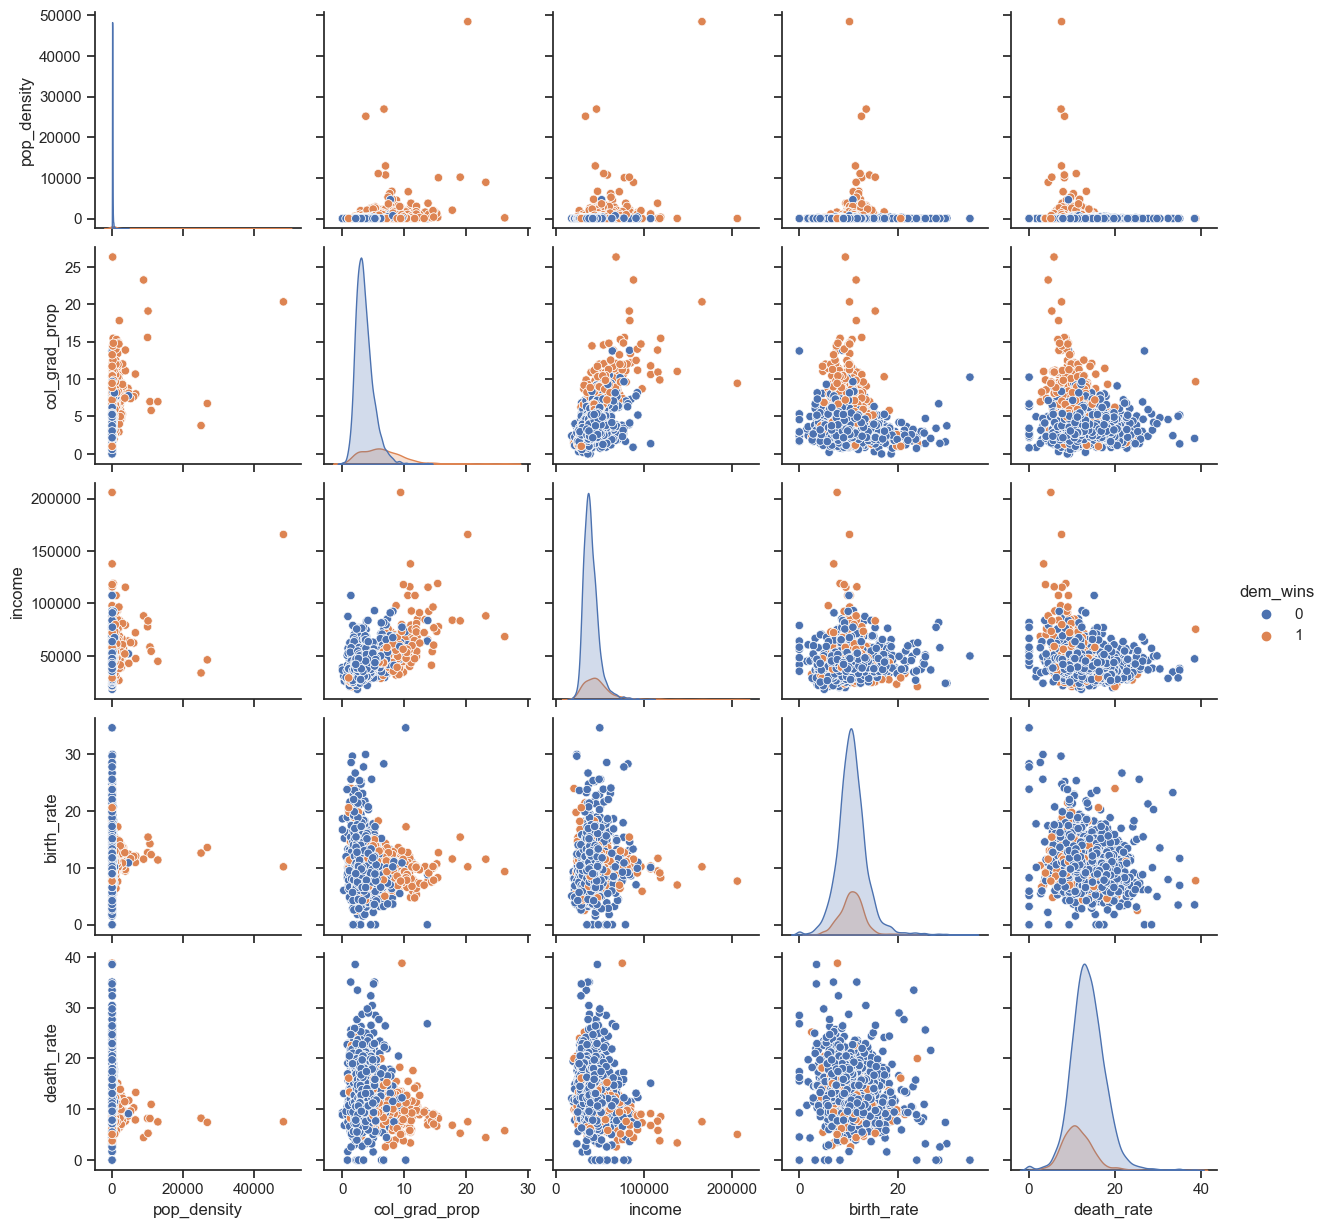

In [11]:
#4.1  Visualize the realationships between population density, education level, income, birth rate, death rate across each of the counties. 
# To do this, you should create a scatterplot matrix. You should color the points in your scatterplot based on whether or not democrats won in that county in 2020. 
# Describe any patterns you see in this visualization. 


# Remember that birth and death rates are per 1000 people
elec_sub = elec_2020[["pop_density", "col_grad_prop", "income", "birth_rate", "death_rate", "dem_wins"]]


sns.set_theme(style="ticks")
sns.pairplot(elec_sub, hue = "dem_wins")
# ORANGE = DEM WINS

#### 4.1 Explanation
Not 100% sure of how to interpret a scatterplot matrix, but this is what I'm seeing. As pop_density and col_grad_prop increase in their respective plots, the number of democratic wins seems to rise alongside them, or at least concentrate where pop_density and income are higher. Income has a similar relationship where the number of orange dots (democratic wins) seems to rise alongside or concentrate along higher income values, but not as strong. There doesn't seem to be a relationship between birth_rate and democratic wins, and it seems that as death_rate rises, the number of blue dots (republican wins) rises.

In [12]:
#4.2 Estimate logistic regression model where you explain democrats’ winning 
# with population density, education level, income, birth rate, death rate, and census region.

m = smf.logit(formula = "dem_wins ~ pop_density + col_grad_prop + income + birth_rate + death_rate + region", data = elec_2020)
r = m.fit()

r.get_margeff().summary()



# Interpretation will be in question 4.4


Optimization terminated successfully.
         Current function value: 0.301989
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
        Logit Marginal Effects       
=====================================
Dep. Variable:               dem_wins
Method:                          dydx
At:                           overall
=======================================================================================
                         dy/dx    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
region[T.northeast]     0.0908      0.014      6.368      0.000       0.063       0.119
region[T.south]         0.0601      0.010      5.826      0.000       0.040       0.080
region[T.west]          0.1289      0.012     11.054      0.000       0.106       0.152
pop_density             0.0002   1.64e-05     13.416      0.000       0.000       0.000
col_grad_prop           0.0456      0.002     18.513      0.000       0.041       0.050
income              -3.683e-06   4.96e-07     -7.423      0.000   -4.65e-06   -2.71e-06
birth_rate              0.0014      0.002      0.927      0.354      -0.002       0.004
death_rate             -0.0070      0.001     -6.033      0.000      -0.009      -0.005
=======================================================================================
"""


#### 4.3 Why do we use logistic regression here, instead of linear regression?
We use logistic regression here because we're using regression to predict a categorical variable: did the democrats win (yes, 1) or did the democrats lose the election (no, 0). Logistic regression is used for predicting discrete, categorical variables like this case of democrats winning / losing. Linear regression is used for estimating continuous, numerical values, which is NOT what we're doing here.


#### 4.4

All results have a near-zero value in the P>|z| column except for birth_rate. This suggests that every result in the regression output is statistically significant except for the results of the birth_rate variable, which had a P>|z| value of 0.354.

In terms of population density, the dy/dx value returned was 0.0002. This means that for every person per square mile added to a region, the odds of the democrats winning in that county go up by 0.02%, assuming that all other variables stay the same. 

On the other hand, the percentage of college graduates in a county (col_grad_prop) increasing by 1% corresponds to an increase in odds of democrats winning of 4.5%, assuming that all other variables stay the same.

For income, the dy/dx value was -3.683e-06, which means that for every dollar increase in personal income (USD/per capita) in a county, the odds of the democrats winning decrease by a very, very small percentage, assuming that all other variables stay the same. 

Birth rate had a dy/dx value of 0.0014, but it's statistically insignificant. For death rate, the dy/dx value was -0.0070, which means that for every increase in deaths per thousand people in a county, the odds of the democrats winning there drop by 0.7%, assuming that all other variables stay the same.

Finally, looking at region: Relative to the Midwest which was used as a baseline, the West, Northeast, and South had dy/dx values of 0.1289, 0.0908, and 0.0601 respectively. This means that, assuming that all other variables stay the same, democrats have 12.89%, 9%, and 6% better odds of winning in the West, Northeast, and South than they do in the Midwest. 